In [1]:
from google.colab import drive

drive.mount('/content/drive')
FOLDERNAME = "Stanford Summer Session/SOC 128D"

import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sb
import plotnine as pn
import numpy as np

mplt.style.use("ggplot")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Read the North Carolina shapefile into R using the process described in section 6.1. Then plot the data using ggplot2. Use a variable other than AREA to fill the shapes, and try using one of the scale_fill_ arguments to create a red color scale. See [these notes on color scales with ggplot](https://ggplot2-book.org/scales-colour.html) for some theory and ideas here.

/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.


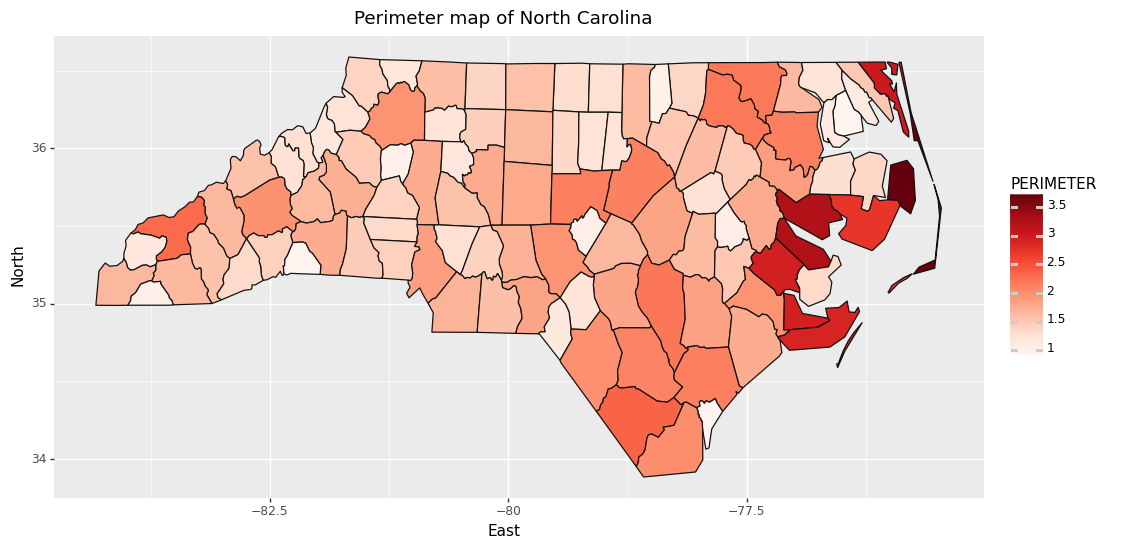

In [2]:
# Python doesn't have an R exact equivalent of simple features, so I downloaded North Carolina's shapefiles from that library: https://github.com/r-spatial/sf/tree/main/inst/shape
import geopandas as gpd

nc_data = gpd.read_file(f"drive/My Drive/{FOLDERNAME}/data/nc.shp")

plot = (
    pn.ggplot(nc_data)+
    pn.geom_map(pn.aes(fill="PERIMETER"))+
    pn.scale_fill_cmap(cmap_name='Reds') +
    pn.theme(figure_size=(12, 6)) +
    pn.labs(title="Perimeter map of North Carolina", x="East", y="North")
  )

print(plot)

2. Read in the CDP hazards data and cities location data from Canvas (“cdp_hazards.csv” and “CDP-Cities-geographical-coordinates.csv”), and plot the cities according to at least one of the hazards. Discuss your graph and what conclusions you might draw about the geographies of risk.

<ipython-input-3-d45c83378440>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active

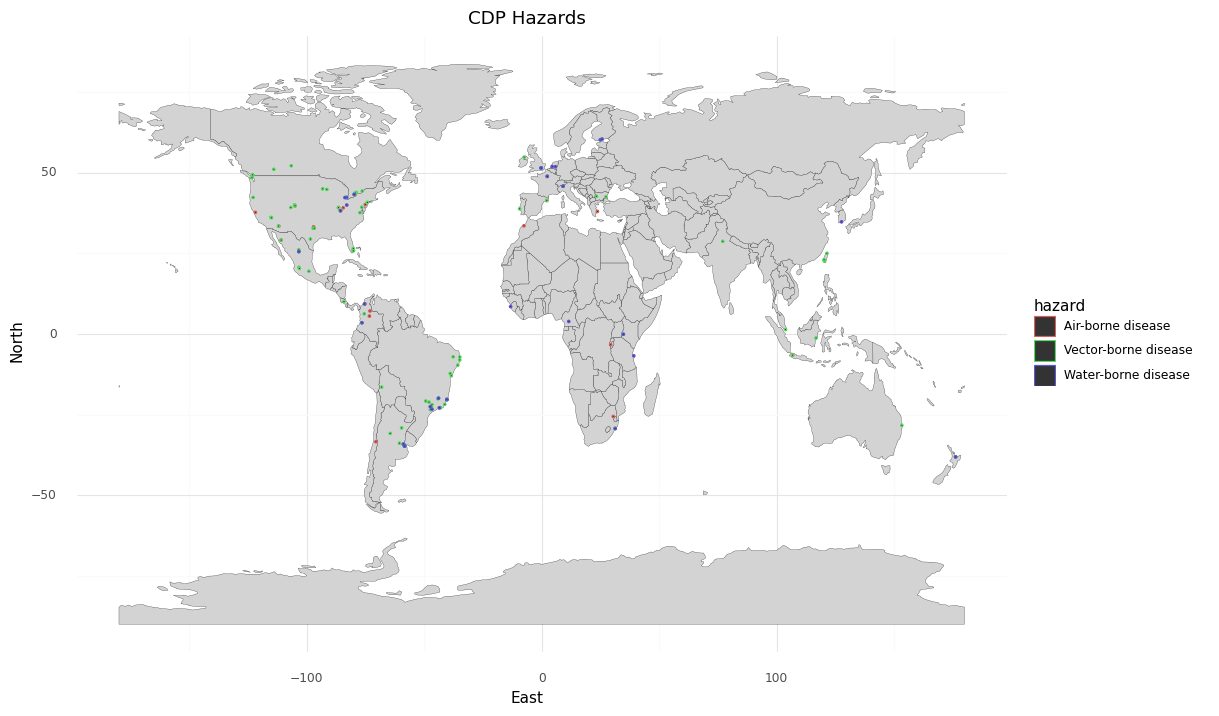

In [3]:
from shapely.geometry import Point

hazards_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/cdp_hazards.csv")
coords_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/CDP-Cities-geographical-coordinates.csv", usecols=["Account.Number", "lat", "long"])
hazards_df = pd.merge(hazards_df, coords_df, left_on=["Account Number"], right_on=["Account.Number"], how="left").drop(columns=["Account.Number", "Column Number"])
hazards_gdf = gpd.GeoDataFrame(hazards_df, geometry=[Point(lon, lat) for lon, lat in zip(hazards_df["long"], hazards_df["lat"])]).dropna(subset=["hazard"])
hazards_gdf = hazards_gdf[hazards_gdf["hazard"].isin([" Vector-borne disease", " Water-borne disease", " Air-borne disease"])]
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Ensuring same CRS
hazards_gdf.crs = world_gdf.crs

hazard_plot = (
    pn.ggplot(hazards_gdf) +
    pn.geom_map(world_gdf, color="black", size=0.1, fill="lightgrey") +
    pn.geom_map(pn.aes(color="hazard")) +
    pn.theme_minimal() +
    pn.theme(figure_size=(12, 8)) +
    pn.labs(title="CDP Hazards", x="East", y="North")
)
print(hazard_plot)

In [ ]:
hazards_gdf[(hazards_gdf["hazard"].isin([" Water-borne disease"])) & (hazards_gdf["CDP Region"] == "North America")].head(20)

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Name,Response Answer,Comments,File Name,Last update,hazard,lat,long,geometry
1501,Cities 2020,2020,50578,City of Windsor,Canada,North America,Climate Hazards and Vulnerability,Climate Hazards,2.1,Please list the most significant climate hazar...,Climate Hazards,Biological hazards > Water-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Water-borne disease,42.3149,-83.0364,POINT (-83.03640 42.31490)
1546,Cities 2020,2020,50555,City of Hamilton,Canada,North America,Climate Hazards and Vulnerability,Climate Hazards,2.1,Please list the most significant climate hazar...,Climate Hazards,Biological hazards > Water-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Water-borne disease,43.2500,-79.8661,POINT (-79.86610 43.25000)
1865,Cities 2020,2020,49333,"City of Louisville, KY",United States of America,North America,Climate Hazards and Vulnerability,Climate Hazards,2.1,Please list the most significant climate hazar...,Climate Hazards,Biological hazards > Water-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Water-borne disease,38.1960,-85.6784,POINT (-85.67840 38.19600)
2183,Cities 2020,2020,54092,City of Ann Arbor,United States of America,North America,Climate Hazards and Vulnerability,Climate Hazards,2.1,Please list the most significant climate hazar...,Climate Hazards,Biological hazards > Water-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Water-borne disease,42.2808,-83.7430,POINT (-83.74300 42.28080)
2298,Cities 2020,2020,43910,City of Columbus,United States of America,North America,Climate Hazards and Vulnerability,Climate Hazards,2.1,Please list the most significant climate hazar...,Climate Hazards,Biological hazards > Water-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Water-borne disease,39.9612,-82.9988,POINT (-82.99880 39.96120)


I was interested in the distribution of risk of diseases, and how they might relate to geographical distribution.

The graph illustrates that the risk of Vector-borne diseases are the most reported, in North and Latin America. Most of these are also near the water body areas. It could be because of the summer season during the period of data collection, where insects like mosquitoes and thrive in warm and humid climates.

Water-borne disease risks are the second most reported, with some in North and Latin America, but also prominent in Europe. Interestingly, those in North America are not near obvious water bodies, unlike the other areas. Upon further investigation through Google Maps however, Ohio River runs down Louisville, KY, Scioto River down Columbus, Huron River down Ann Arbor, Detroit River down Windsor and Hamilton is near the bay. It is interesting then, that this disease did not spread further downstream. Perhaps these areas are generally poorer/less accessible/affordable healthcare?

Finally, air-borne diease risks are very sparse and there is generally not a pattern or clustering.

3. Now do the same thing, but for the CDP actions data (“cdp_actions.csv”). Do you notice any differences between the cities facing hazards and those that are taking actions?


/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry 

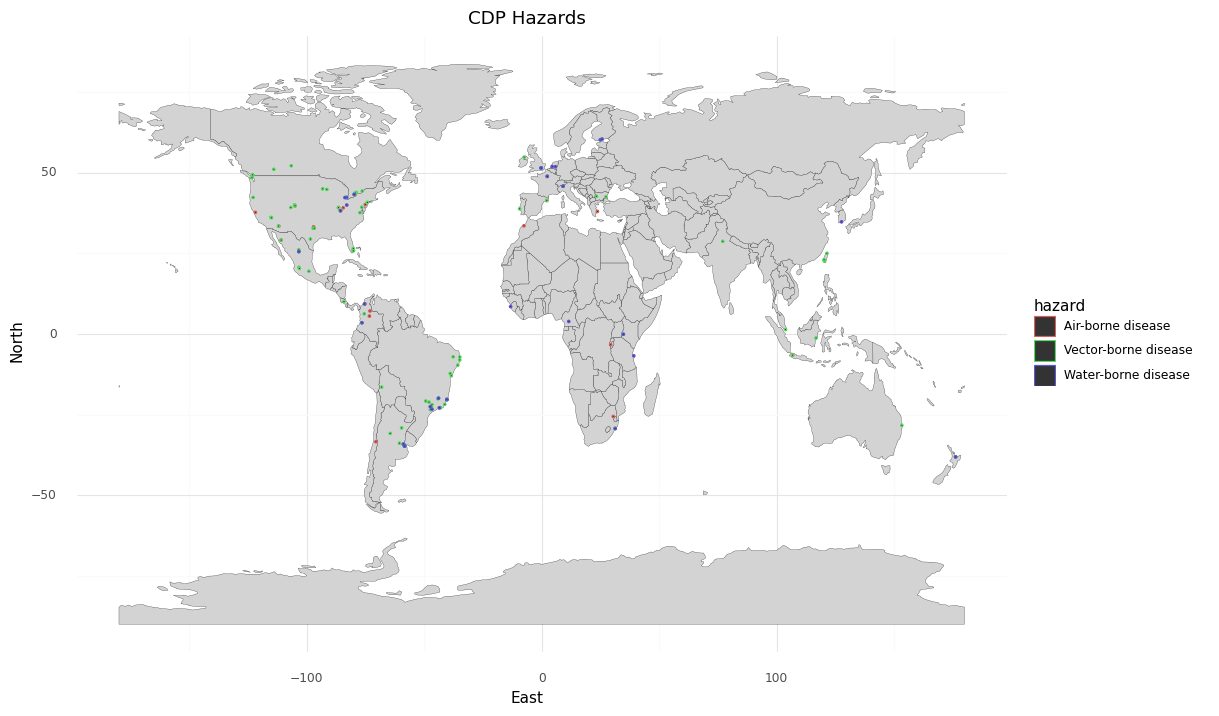

/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry 

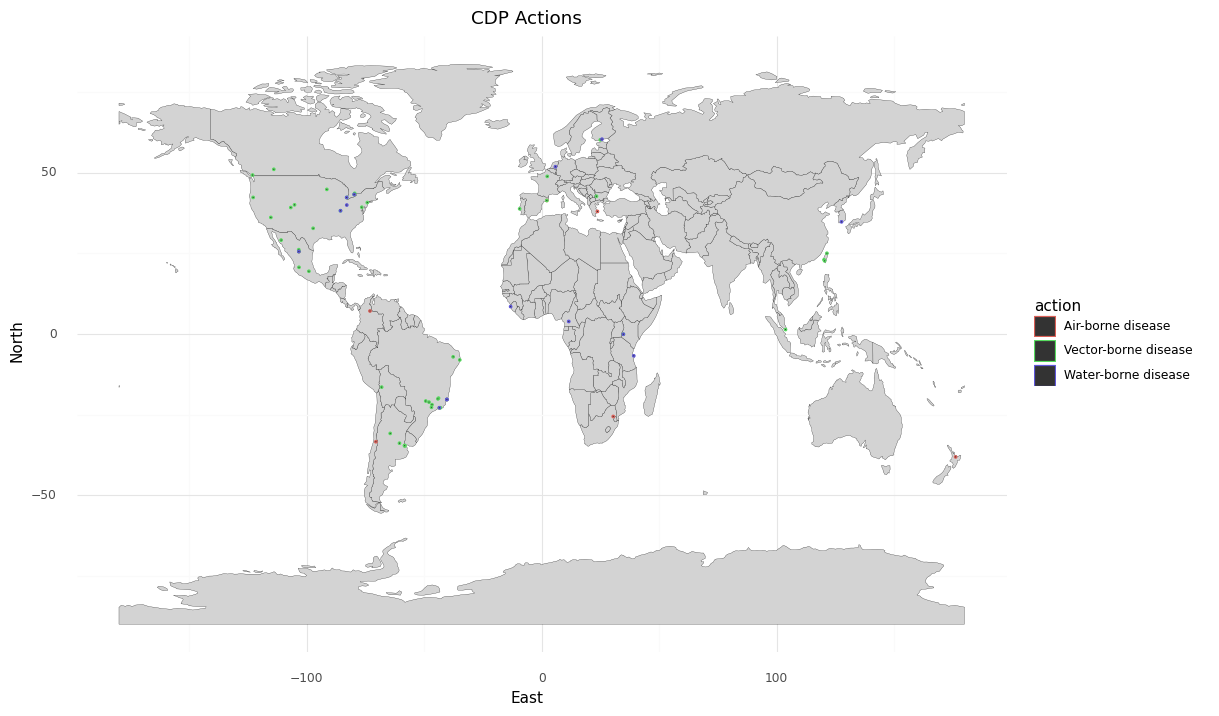

In [ ]:
actions_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/cdp_actions.csv")
actions_df = pd.merge(actions_df, coords_df, left_on=["Account Number"], right_on=["Account.Number"], how="left").drop(columns=["Account.Number", "Column Number"])
actions_gdf = gpd.GeoDataFrame(actions_df, geometry=[Point(lon, lat) for lon, lat in zip(actions_df["long"], actions_df["lat"])])
actions_gdf = actions_gdf[actions_gdf["action"].isin([" Vector-borne disease", " Water-borne disease", " Air-borne disease"])].dropna(subset=["action"])
actions_gdf.crs = world_gdf.crs

action_plot = (
    pn.ggplot(actions_gdf) +
    pn.geom_map(world_gdf, color="black", size=0.1, fill="lightgrey") +
    pn.geom_map(pn.aes(color="action")) +
    pn.theme_minimal() +
    pn.theme(figure_size=(12, 8)) +
    pn.labs(title="CDP Actions", x="East", y="North")
)
print(hazard_plot)
print(action_plot)

In [ ]:
not_solved_gdf = pd.merge(actions_gdf, hazards_gdf[["Account Number", "hazard"]], left_on=["Account Number"], right_on=["Account Number"], how="right").dropna(subset=["Questionnaire"])
not_solved_gdf

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Name,Response Answer,Comments,File Name,Last update,action,lat,long,geometry,hazard
1,Cities 2020,2020.0,42388,Intendencia de Montevideo,Uruguay,Latin America,Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,Climate hazards,Biological hazards > Vector-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Vector-borne disease,-34.7112,-58.2987,POINT (-58.29870 -34.71120),Vector-borne disease
4,Cities 2020,2020.0,50549,City of Fort Worth,United States of America,North America,Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,Climate hazards,Biological hazards > Vector-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Vector-borne disease,32.7555,-97.3308,POINT (-97.33080 32.75550),Vector-borne disease
9,Cities 2020,2020.0,60142,City of Kisumu,Kenya,Africa,Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,Climate hazards,Biological hazards > Water-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Water-borne disease,-0.0917,34.7679,POINT (34.76790 -0.09170),Vector-borne disease
10,Cities 2020,2020.0,60142,City of Kisumu,Kenya,Africa,Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,Climate hazards,Biological hazards > Vector-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Vector-borne disease,-0.0917,34.7679,POINT (34.76790 -0.09170),Vector-borne disease
11,Cities 2020,2020.0,63601,"Township of Maplewood, NJ",United States of America,North America,Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,Climate hazards,Biological hazards > Vector-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Vector-borne disease,40.7300,-74.2700,POINT (-74.27000 40.73000),Vector-borne disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Cities 2020,2020.0,50381,Municipio de Torreón,Mexico,Latin America,Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,Climate hazards,Biological hazards > Air-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Air-borne disease,25.5428,-103.4070,POINT (-103.40700 25.54280),Vector-borne disease
180,Cities 2020,2020.0,50381,Municipio de Torreón,Mexico,Latin America,Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,Climate hazards,Biological hazards > Water-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Water-borne disease,25.5428,-103.4070,POINT (-103.40700 25.54280),Vector-borne disease
181,Cities 2020,2020.0,50381,Municipio de Torreón,Mexico,Latin America,Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,Climate hazards,Biological hazards > Vector-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Vector-borne disease,25.5428,-103.4070,POINT (-103.40700 25.54280),Vector-borne disease
185,Cities 2020,2020.0,35853,City of Baltimore,United States of America,North America,Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,Climate hazards,Biological hazards > Vector-borne disease,NaN,NaN,09/07/2020 09:45:36 AM,Vector-borne disease,39.2904,-76.6122,POINT (-76.61220 39.29040),Vector-borne disease


In general, a lot less actions are taken than there are reports of hazards.

Vector-borne diseases are the most mitigated, however, water-borne diseases are the least mitigated, despite being the 2nd most reported hazard.

There are some cities that take action against the exact reported hazard, which is great. But in not_solved_gdp, there are many cities which did not manage to address the reported issue. Most of them do seem to be in poorer areas, like rural Latin America and Mexico, etc.

4. Use the tigris function to download shapefiles of your choice. Plot the data using ggplot().



Using FIPS code '06' for input 'CA'


/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.


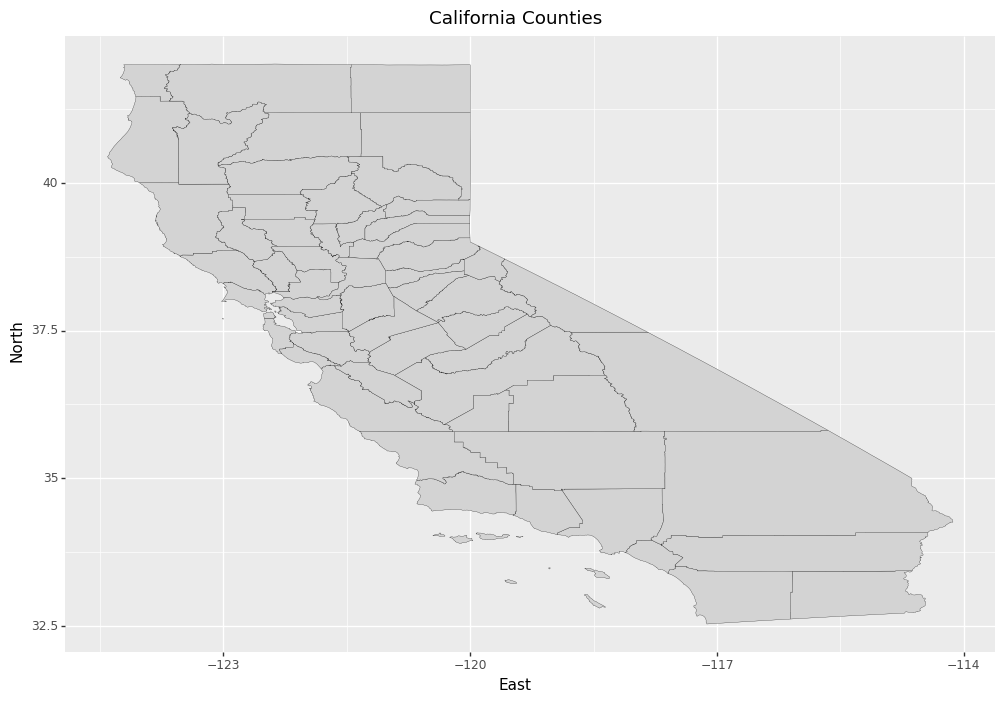

In [5]:
# !pip install pygris
import pygris

ca_df = pygris.counties(state="CA", year="2022", cb=True)
ca_gdf = gpd.GeoDataFrame(ca_df)
ca_plot = (
    pn.ggplot(ca_gdf) +
    pn.geom_map( color="black", size=0.1, fill="lightgrey") +
    pn.theme(figure_size=(12, 8)) +
    pn.labs(title="California Counties", x="East", y="North")
)
print(ca_plot)

5. Download one of the clean AQI monitor datasets from Canvas (“aqi22_clean_us.csv” or “aqi22_clean_ca.csv”) and plot these inside the boundaries that you have downloaded from tigris. Then, calculate the average PM2.5 levels in each of the geographical units, and plot your geographies again according to these levels (as we did in section 6.5). Which areas had the best (and worst) air quality in 2022? What are the implications?

/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry 

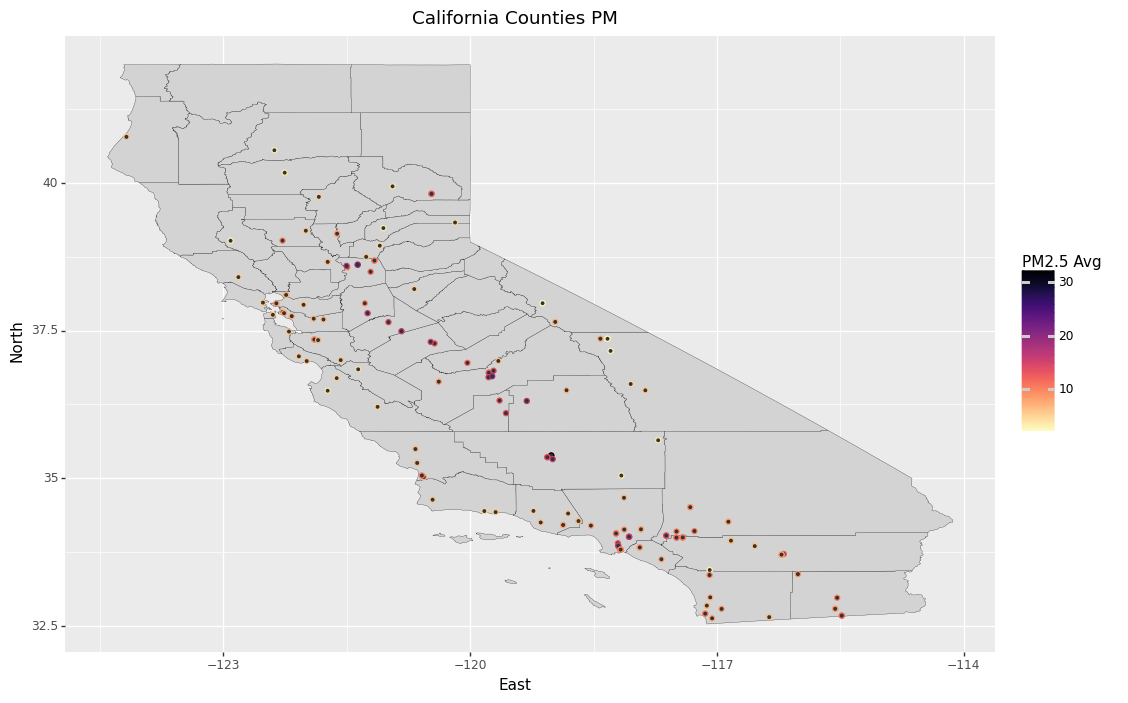

In [ ]:
aqi_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/aqi22_clean_ca.csv", usecols=lambda col: col not in ["State Code", "County Code", "Site Num", "Parameter Code"])
aqi_gdf = gpd.GeoDataFrame(aqi_df, geometry=[Point(lon, lat) for lon, lat in aqi_df["geometry"].str.strip("c()").str.split(",")])
# Changing CRS of aqi to that of ca
aqi_gdf.crs = ca_gdf.crs

pm_plot = (
    pn.ggplot(aqi_gdf) +
    pn.geom_map(ca_gdf, color="black", size=0.1, fill="lightgrey") +
    pn.geom_map(pn.aes(color="Arithmetic Mean"), size=1.6) +
    pn.scale_color_cmap(cmap_name='magma_r') +
    pn.theme(figure_size=(12, 8)) +
    pn.labs(title="California Counties PM", x="East", y="North", color="PM2.5 Avg")
)
print(pm_plot)

/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
/usr/local/lib/python3.10/dist-packages/plotnine/mapping/evaluation.py:216: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry 

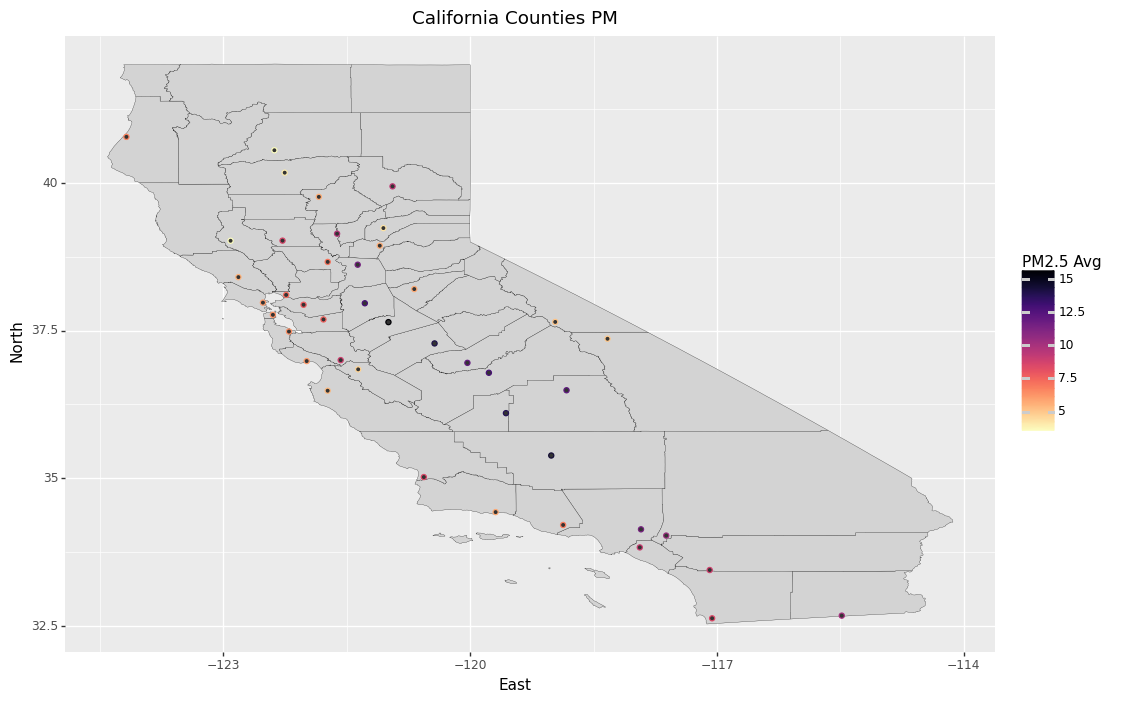

In [9]:
aqi_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/aqi22_clean_ca.csv", usecols=lambda col: col not in ["State Code", "County Code", "Site Num", "Parameter Code"])
mean_aqi = aqi_df.groupby("County Name").agg({
    "Arithmetic Mean": "mean",
    "State Name": "first",
    "City Name": "first",
    "geometry": "first"

})
mean_aqi_df = pd.DataFrame(mean_aqi).reset_index().rename(columns={"Arithmetic Mean": "Mean AQI"})
mean_aqi_gdf = gpd.GeoDataFrame(mean_aqi_df, geometry=[Point(lon, lat) for lon, lat in mean_aqi_df["geometry"].str.strip("c()").str.split(",")])
# Changing CRS of aqi to that of ca
mean_aqi_gdf.crs = ca_gdf.crs

pm_plot = (
    pn.ggplot(mean_aqi_gdf) +
    pn.geom_map(ca_gdf, color="black", size=0.1, fill="lightgrey") +
    pn.geom_map(pn.aes(color="Mean AQI"), size=1.6) +
    pn.scale_color_cmap(cmap_name='magma_r') +
    pn.theme(figure_size=(12, 8)) +
    pn.labs(title="California Counties PM", x="East", y="North", color="PM2.5 Avg")
)
print(pm_plot)

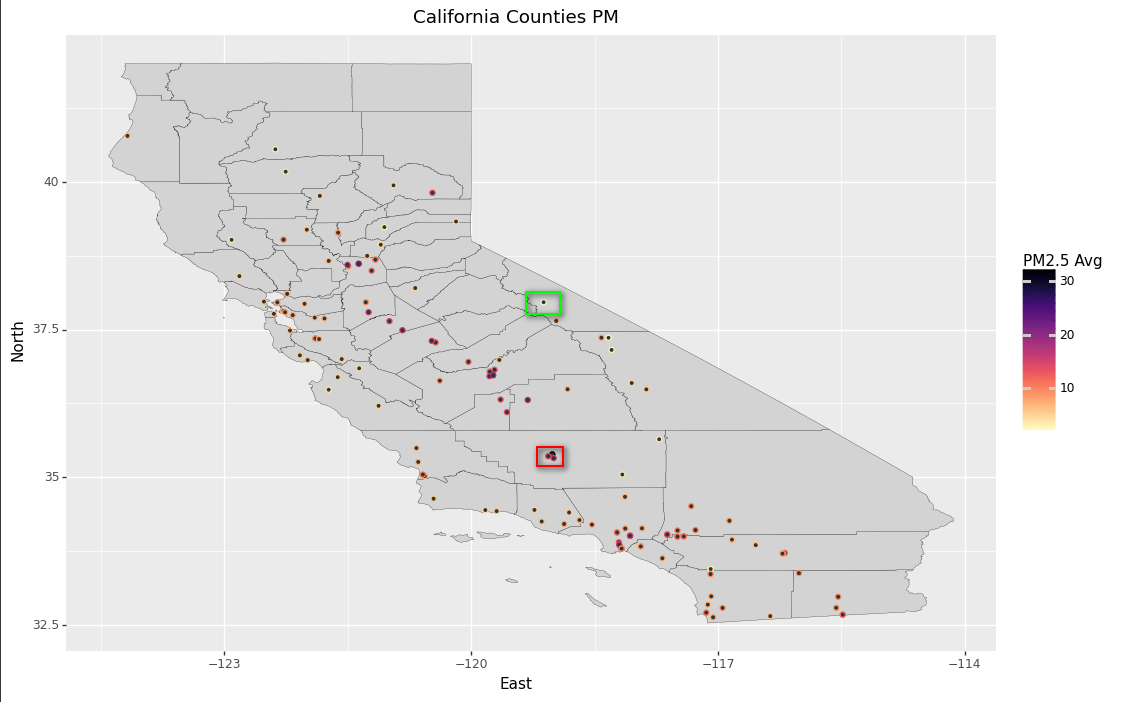

I wasn't sure which to plot, based on the question, so I plotted both since they are quite similar.

As highlighted in green, the area with the best air quality seems to be the county of Mono.

As highlighted in red, the area with the worst air quality seems to be the county of Kern, in the city of Bakersfield.

Interestingly, a common trend is that usually areas with poor air quality are usually clustered together, while those with good air quality are not. Of course, since this dataset concerns air quality monitors, it is likely that more monitors are placed in areas with concerning air quality than those without. It could also be that air in areas with poor air quality often spreads to surrouding areas, worsening overall air quality in the vicinity.

In [ ]:
# If it contains spaces, use '\ ' to represent each space E.g. 'Summer\ PSet\ 1.ipynb'
FILENAME = "6_Maps_Spatial_Data.ipynb"

%cd drive/My\ Drive
%cd $FOLDERNAME
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!pip install PyPDF2

!jupyter nbconvert --log-level CRITICAL --to pdf $FILENAME

/content/drive/My Drive
/content/drive/My Drive/Stanford Summer Session/SOC 128D
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
